<a href="https://colab.research.google.com/github/malcolmrite-dsi/WSB_Stock_Screener/blob/main/Reddit_Stock_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [105]:
!pip install praw

Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/



*   PRAW:  Python Reddit API Wrapper, allows easy access to Reddit Data
*   Pandas: To handle the data from the scraping in well formatted tables
*   datetime: To convert the raw date format into an understandable format



In [106]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


# Getting the Data from Reddit

Function Definitions









In [107]:
def authorise_extractor(twofactorcode):
    #Initialising the credentials for the API
    reddit = praw.Reddit(client_id='1h1Pkh53dcBSLA', \
                             client_secret='Lm4-BO2A5GpHoYnzEUEMMLOoH1TpIw', \
                             user_agent='Reddit_Stock by u/Get_Rich_Bot', \
                             username='Get_Rich_Bot', \
                             password= f'B+4H-5yww=<QJUV:{twofactorcode}')
    return reddit
    
    
def test_extractor(self):
    #Testing if the authorisation worked
    #For Reference: https://praw.readthedocs.io/en/latest/getting_started/quick_start.html
    print(self.read_only)
    
    # assume you have a reddit instance bound to variable `reddit`
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    
    #Validate that the subreddit extractor is working
    print(subreddit.display_name)
    print(subreddit.title)
    print(self.user.me())
    
    #Getting example submissions from the subreddit
    for submission in subreddit.top(limit=15):
        print(submission.title)  # Output: the submission's title
        print(submission.score)  # Output: the submission's score
        print(submission.id)     # Output: the submission's ID
        print(submission.url)    # Output: the URL the submission points to
                                # or the submission's URL if it's a self post

#For Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/
def get_date(created):
        return dt.datetime.fromtimestamp(created)
    
#Returns a dataframe of the top reddit posts from WSB
def extract_top_data(self,type, posts):
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    #Create a dictionary to store the data   
                                
    topics_dict = { "title":[], \
                    "score":[], \
                    "id":[], \
                    "url":[], \
                    "comms_num": [], \
                    "created": []}
    
    if type == "top":
      #Extract the top posts with an upper limit defined by the user
      top_subreddit = subreddit.top(limit=posts)
    elif type == "hot":
      top_subreddit = subreddit.hot(limit=posts)
    elif type == "new":
      top_subreddit = subreddit.new(limit=posts)
    else:
      top_subreddit = subreddit.rising(limit=posts)

    
    #Extract the relevant data from the subreddit
    for submission in top_subreddit:
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        
        
    topics_data = pd.DataFrame(topics_dict)
    
    _timestamp = topics_data["created"].apply(get_date)
    topics_data = topics_data.assign(timestamp = _timestamp)

    return topics_data

## Officially Getting the Data

In [179]:
posts = 100

In [108]:
reddit = authorise_extractor("852856")

train_data = extract_top_data(reddit, "top" ,posts)

print(train_data.head())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  ...           timestamp
0                             Times Square right now  ... 2021-01-31 02:00:38
1             UPVOTE so everyone sees we got SUPPORT  ... 2021-01-28 21:40:34
2                      GME YOLO update — Jan 28 2021  ... 2021-01-29 05:06:23
3               GME YOLO month-end update — Jan 2021  ... 2021-01-30 05:04:45
4  CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...  ... 2021-01-28 21:49:11

[5 rows x 7 columns]


In [109]:
train_data

,title,score,id,url,comms_num,created,timestamp
0,Times Square right now,371538,l8rf4k,https://v.redd.it/x64z70f7eie61,11947,1.612058e+09,2021-01-31 02:00:38
1,UPVOTE so everyone sees we got SUPPORT,300712,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12766,1.611870e+09,2021-01-28 21:40:34
2,GME YOLO update — Jan 28 2021,268647,l78uct,https://i.redd.it/opzucppb15e61.png,24160,1.611897e+09,2021-01-29 05:06:23
3,GME YOLO month-end update — Jan 2021,242543,l846a1,https://i.redd.it/r557em3t5ce61.png,20996,1.611983e+09,2021-01-30 05:04:45
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217269,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18540,1.611871e+09,2021-01-28 21:49:11
...,...,...,...,...,...,...,...
95,"CITADEL IS THE 5TH LARGEST OWNER OF SLV, IT'S ...",92727,l9gv98,https://i.redd.it/iltzmggybpe61.jpg,9512,1.612142e+09,2021-02-01 01:20:18
96,Together no one can stop us !!!,91865,lbd21v,https://i.redd.it/3224ybp596f61.jpg,2275,1.612347e+09,2021-02-03 10:14:54
97,"Ethan Klein (h3h3 podcast) joins the battle, t...",91336,l7oq0j,https://i.redd.it/l4n7bnp0u8e61.jpg,2082,1.611943e+09,2021-01-29 17:51:16
98,Spread the word! 💎🤲,90508,l9teai,https://i.redd.it/fk8im2cz9se61.jpg,1143,1.612178e+09,2021-02-01 11:14:44


# Exploratory Data Analysis

In [110]:
train_data.describe()

,score,comms_num,created
count,100.000000,100.000000,1.000000e+02
mean,138216.500000,6021.820000,1.612043e+09
std,47182.626823,5556.783566,2.028015e+05
min,90304.000000,1045.000000,1.611724e+09
25%,105634.500000,2642.000000,1.611888e+09
50%,127176.500000,4368.500000,1.611975e+09
75%,155511.500000,6706.750000,1.612218e+09
max,371538.000000,28754.000000,1.612607e+09


In [111]:
train_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
timestamp    datetime64[ns]
dtype: object

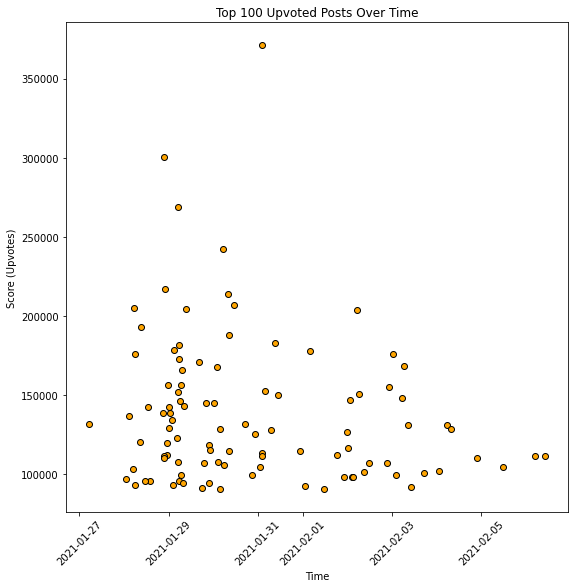

In [196]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Upvoted Posts Over Time")
plt.xlabel("Time")
plt.xticks(rotation = 45)
plt.ylabel("Score (Upvotes)")
plt.scatter(train_data.timestamp, train_data.score,linewidths=1,marker = 'o',edgecolors="k", c='orange')
plt.show()

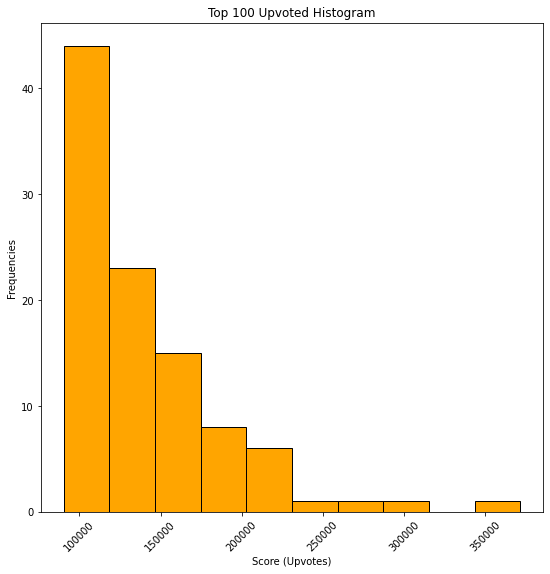

In [223]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Upvoted Histogram")
plt.xlabel("Score (Upvotes)")
plt.xticks(rotation = 45)
plt.ylabel("Frequencies")
plt.hist(train_data.score, color = "orange", ls = "-", linewidth=1, edgecolor="k")
plt.show()

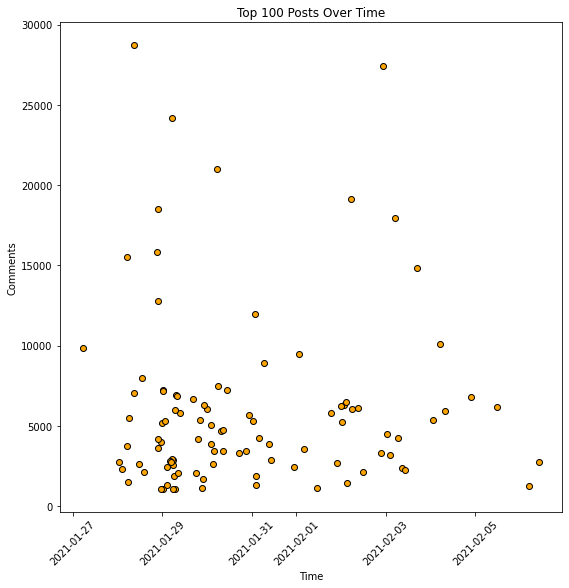

In [209]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Posts Over Time")
plt.xlabel("Time")
plt.xticks(rotation = 45)
plt.ylabel("Comments")
plt.scatter(train_data.timestamp, train_data.comms_num,linewidths=1,marker = 'o',edgecolors="k", c='orange')
plt.show()

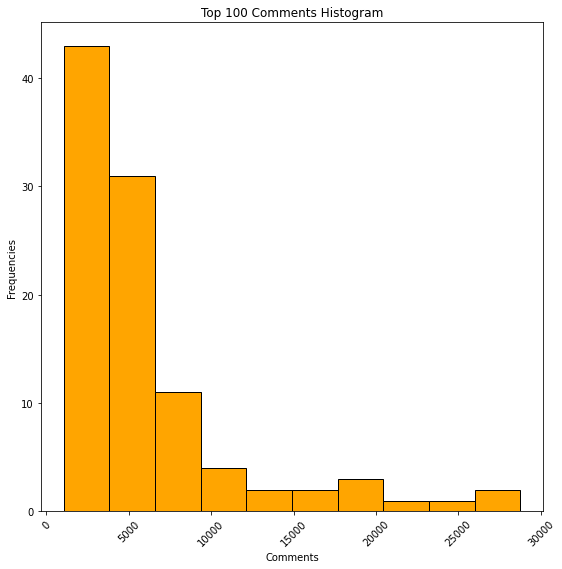

In [224]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Comments Histogram")
plt.xlabel("Comments")
plt.xticks(rotation = 45)
plt.ylabel("Frequencies")
plt.hist(train_data.comms_num, color = "orange", ls = "-", linewidth=1, edgecolor="k")
plt.show()

# Text Extraction

In [113]:
!pip install yfinance

## Importing Text Blob: https://textblob.readthedocs.io/en/dev/quickstart.html

In [114]:
from textblob import TextBlob
import nltk
from pandas_datareader import data
import yfinance

In [115]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Function Declarations

In [116]:
def get_keyword_length(keywords):
  return len(keywords)

def get_keywords(title):
  header = TextBlob(title)
  return header.noun_phrases

def get_subjectivity(title):
  header = TextBlob(title)
  sentiment = header.sentiment.subjectivity
  return sentiment

def get_stock_name(title):
  header = TextBlob(title)
  for word in header.words:
    try:
      data = yfinance.Ticker(noun)
      stock = data.info["symbol"]
      break

    except:
      stock = "NA" 
  
  return stock

def get_sentiment(title):
  header = TextBlob(title)
  sentiment = header.sentiment.polarity
  return sentiment

## EDA

In [117]:
header = TextBlob(train_data.iloc[3,0])

In [118]:
header.noun_phrases

WordList(['gme yolo', 'month-end update —', 'jan'])

In [119]:
for sentence in header.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [120]:
for noun in header.words:
    print(noun)

GME
YOLO
month-end
update
—
Jan
2021


For Reference: pypi.org/project/yfinance/

## Feature Engineering

Get the key words (Noun Phrases) from the submission title

In [121]:
_keywords = train_data["title"].apply(get_keywords)
train_data = train_data.assign(keywords = _keywords)

train_data.head()

,title,score,id,url,comms_num,created,timestamp,keywords
0,Times Square right now,371538,l8rf4k,https://v.redd.it/x64z70f7eie61,11947,1.612058e+09,2021-01-31 02:00:38,[]
1,UPVOTE so everyone sees we got SUPPORT,300712,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12766,1.611870e+09,2021-01-28 21:40:34,"[upvote, support]"
2,GME YOLO update — Jan 28 2021,268647,l78uct,https://i.redd.it/opzucppb15e61.png,24160,1.611897e+09,2021-01-29 05:06:23,"[gme yolo, update —, jan]"
3,GME YOLO month-end update — Jan 2021,242543,l846a1,https://i.redd.it/r557em3t5ce61.png,20996,1.611983e+09,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]"
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217269,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18540,1.611871e+09,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar..."


Getting the keyword (Noun Phrases) count for each post title

In [122]:
_count= train_data["keywords"].apply(get_keyword_length)
train_data = train_data.assign(keyword_count = _count)

train_data.head()

,title,score,id,url,comms_num,created,timestamp,keywords,keyword_count
0,Times Square right now,371538,l8rf4k,https://v.redd.it/x64z70f7eie61,11947,1.612058e+09,2021-01-31 02:00:38,[],0
1,UPVOTE so everyone sees we got SUPPORT,300712,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12766,1.611870e+09,2021-01-28 21:40:34,"[upvote, support]",2
2,GME YOLO update — Jan 28 2021,268647,l78uct,https://i.redd.it/opzucppb15e61.png,24160,1.611897e+09,2021-01-29 05:06:23,"[gme yolo, update —, jan]",3
3,GME YOLO month-end update — Jan 2021,242543,l846a1,https://i.redd.it/r557em3t5ce61.png,20996,1.611983e+09,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]",3
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217269,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18540,1.611871e+09,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar...",7


Use Sentiment Analysis from TextBlob to get the sentiment of each title

In [123]:
_sentiment = train_data["title"].apply(get_sentiment)
train_data = train_data.assign(sentiment = _sentiment)

train_data.head()

,title,score,id,url,comms_num,created,timestamp,keywords,keyword_count,sentiment
0,Times Square right now,371538,l8rf4k,https://v.redd.it/x64z70f7eie61,11947,1.612058e+09,2021-01-31 02:00:38,[],0,0.285714
1,UPVOTE so everyone sees we got SUPPORT,300712,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12766,1.611870e+09,2021-01-28 21:40:34,"[upvote, support]",2,0.000000
2,GME YOLO update — Jan 28 2021,268647,l78uct,https://i.redd.it/opzucppb15e61.png,24160,1.611897e+09,2021-01-29 05:06:23,"[gme yolo, update —, jan]",3,0.000000
3,GME YOLO month-end update — Jan 2021,242543,l846a1,https://i.redd.it/r557em3t5ce61.png,20996,1.611983e+09,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]",3,0.000000
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217269,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18540,1.611871e+09,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar...",7,0.072596


Use Text Blob to get the subjectivity of each title

In [124]:
_subjectivity = train_data["title"].apply(get_subjectivity)
train_data = train_data.assign(subjectivity = _subjectivity)

train_data.head()

,title,score,id,url,comms_num,created,timestamp,keywords,keyword_count,sentiment,subjectivity
0,Times Square right now,371538,l8rf4k,https://v.redd.it/x64z70f7eie61,11947,1.612058e+09,2021-01-31 02:00:38,[],0,0.285714,0.535714
1,UPVOTE so everyone sees we got SUPPORT,300712,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12766,1.611870e+09,2021-01-28 21:40:34,"[upvote, support]",2,0.000000,0.000000
2,GME YOLO update — Jan 28 2021,268647,l78uct,https://i.redd.it/opzucppb15e61.png,24160,1.611897e+09,2021-01-29 05:06:23,"[gme yolo, update —, jan]",3,0.000000,0.000000
3,GME YOLO month-end update — Jan 2021,242543,l846a1,https://i.redd.it/r557em3t5ce61.png,20996,1.611983e+09,2021-01-30 05:04:45,"[gme yolo, month-end update —, jan]",3,0.000000,0.000000
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217269,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18540,1.611871e+09,2021-01-28 21:49:11,"[class action against robinhood, allowing, mar...",7,0.072596,0.432372


# More EDA

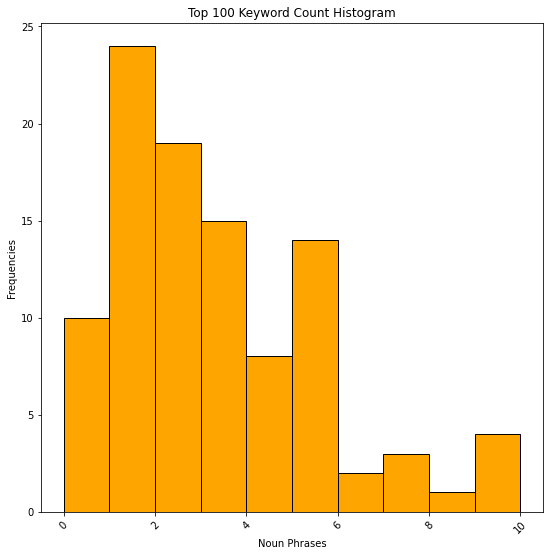

In [225]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Keyword Count Histogram")
plt.xlabel("Noun Phrases")
plt.xticks(rotation = 45)
plt.ylabel("Frequencies")
plt.hist(train_data.keyword_count, color = "orange", ls = "-", linewidth=1, edgecolor="k")
plt.show()

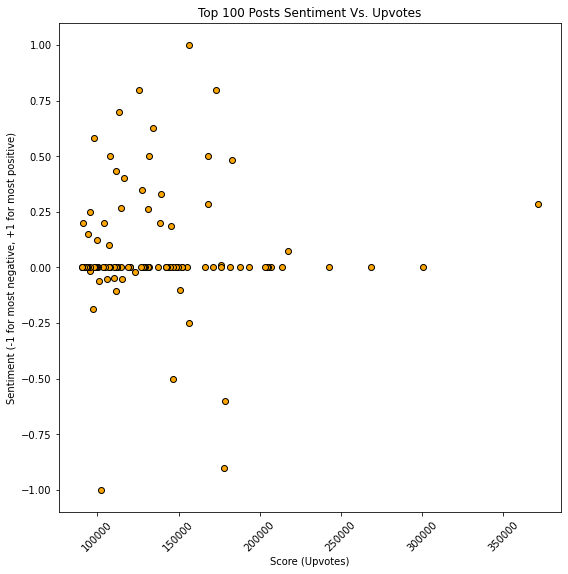

In [219]:
plt.figure(figsize=(9,9))
plt.title(f"Top {posts} Posts Sentiment Vs. Upvotes")
plt.xlabel("Score (Upvotes)")
plt.xticks(rotation = 45)
plt.ylabel("Sentiment (-1 for most negative, +1 for most positive)")
plt.scatter(train_data.score, train_data.sentiment,linewidths=1,marker = 'o',edgecolors="k", c='orange')
plt.show()

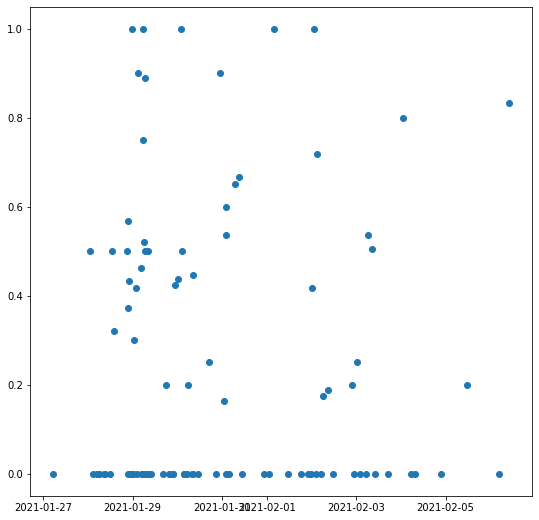

In [127]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.subjectivity)
plt.show()

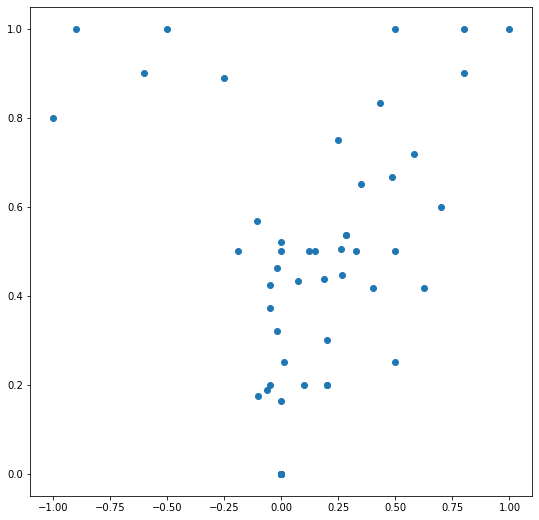

In [128]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.sentiment, train_data.subjectivity)
plt.show()

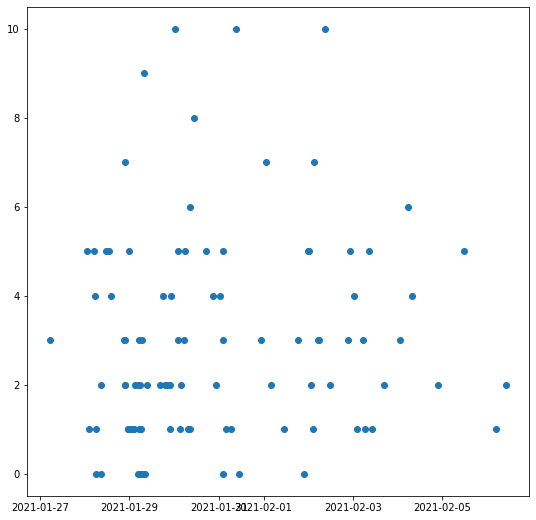

In [129]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.keyword_count)
plt.show()

In [130]:
train_data.describe()

,score,comms_num,created,keyword_count,sentiment,subjectivity
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,138216.500000,6021.820000,1.612043e+09,2.890000,0.067083,0.242296
std,47182.626823,5556.783566,2.028015e+05,2.339364,0.279557,0.319896
min,90304.000000,1045.000000,1.611724e+09,0.000000,-1.000000,0.000000
25%,105634.500000,2642.000000,1.611888e+09,1.000000,0.000000,0.000000
50%,127176.500000,4368.500000,1.611975e+09,2.000000,0.000000,0.000000
75%,155511.500000,6706.750000,1.612218e+09,4.000000,0.105518,0.500000
max,371538.000000,28754.000000,1.612607e+09,10.000000,1.000000,1.000000


# Some K-Means Clustering

### Importing the Libraries : https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1



In [131]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Scaling the Data

In [133]:
scaler = MinMaxScaler()
data = train_data.iloc[:,8:]

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


### The Clustering

In [134]:
Kmean = KMeans(n_clusters=3)

Kmean.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
Kmean.cluster_centers_

array([[0.19285714, 0.50178571, 0.01498016],
       [0.185     , 0.56012397, 0.73813264],
       [0.6       , 0.58548721, 0.35950253]])

In [136]:
Kmean.labels_

array([1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0], dtype=int32)

For Reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [137]:
from mpl_toolkits import mplot3d

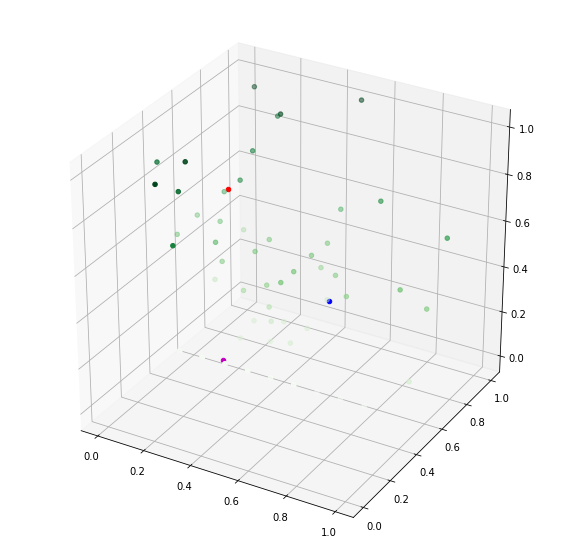

In [138]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

#Data for three-dimensional scattered points
ax.scatter3D(data_scaled.iloc[:,0], data_scaled.iloc[:,1], data_scaled.iloc[:,2], c=data_scaled.iloc[:,2], cmap='Greens')
ax.scatter3D(0.6       , 0.58548721, 0.35950253, c='b')
ax.scatter3D(0.19285714, 0.50178571, 0.01498016, c='m')
ax.scatter3D(0.185     , 0.56012397, 0.73813264, c='r')

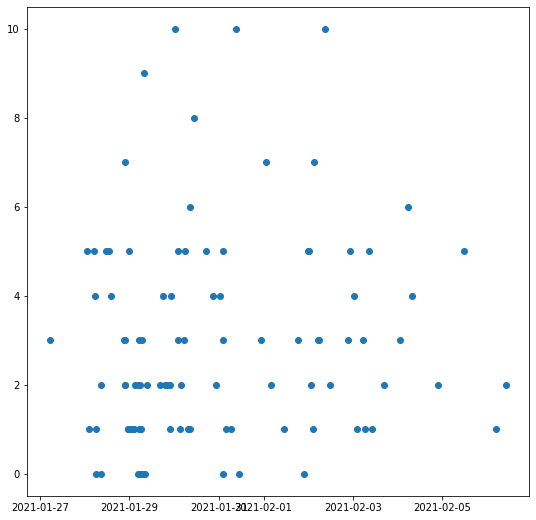

In [139]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.keyword_count)
plt.show()

# Word Cloud Generator. For Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

Importing the Libraries

In [173]:
import wordcloud
from PIL import Image
import numpy as np


Merging all the Keywords

In [143]:
all_keywords = ""

for keywords in train_data.keywords:

  #Convert list to a string
  str1 = ' '.join(keywords)

  #Add to the total string
  all_keywords = all_keywords + str1 + " "



In [144]:
all_keywords

" upvote support gme yolo update — jan gme yolo month-end update — jan class action against robinhood allowing market manipulation class action robinhood hedge funds loose money ’ s treason used gme nintendo switches gamestop 's hospital got local news wsb gme yolo update — jan guess i need it power to the traders now gme yolo update — feb mods thank ’ s good fortune nintendo switches ’ s minnesota cant stop won ’ t stop gamestop will not sell  crazy ca n't drew fellow retards 💎🙌🏼 mark cuban ama cnbc wsb aoc ’ m we in the endgame now wsb almighty u/deepfuckingvalue history books wallstreetbets   important there are no sellers do not panic if you see price drop hold the line upvote so people don t panic hey mark cuban jumping ama anything favourite analyst doing negative sentiment comment multiple times minute 🌈🐻  gme yolo update — feb fake news 🤣 mic wsb pioneer fearless bag holder better than diamond hands richer than your wife ’ s boyfriend ’ s uncle yes this is none other than deepf

In [165]:
stopwords = set(wordcloud.STOPWORDS) 

In [174]:
maskArray = np.array(Image.open("drive/MyDrive/reddit-logo.png"))

In [175]:

wordcloud = wordcloud.WordCloud(width = 1200, height = 700, 
                background_color ='white', 
                colormap = 'Oranges',
                max_words = 200,
                mask = maskArray,
                stopwords = stopwords, 
                min_font_size = 10) 
wordcloud.generate(all_keywords)


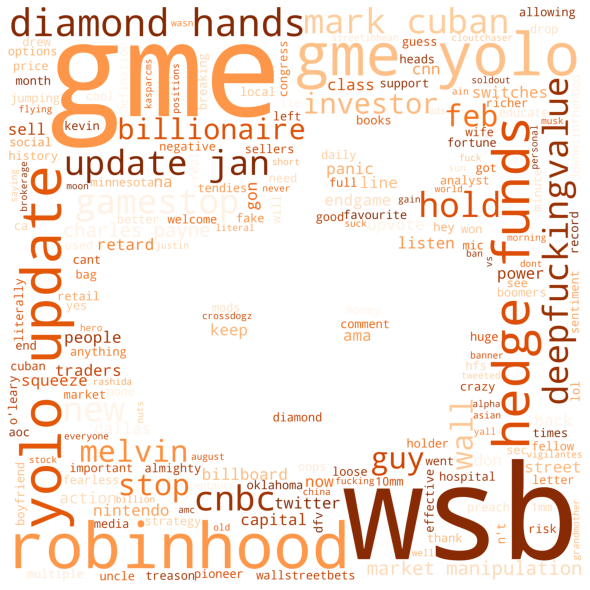

In [171]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 